In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Task 1

In [4]:
import cv2

#Loading the RGB image
image = cv2.imread('img.png',1)

#Displaying the image
cv2.imshow ('Title of the window', image)
cv2.waitKey(1)

-1

In [6]:
#Converting the RGB image to Gray Scale image
import numpy as np
gray_img = np.dot(image,[0.3 , 0.59 , 0.11])
img= gray_img.astype(np.uint8)

#Displaying the image
cv2.imshow ('Title of the window', img)
cv2.waitKey(1)

-1

Task 2

In [7]:
import json 
dump= json.dumps(img.tolist()) 
with open("image.json", "w") as r: 
     r.write(dump)

Task 3

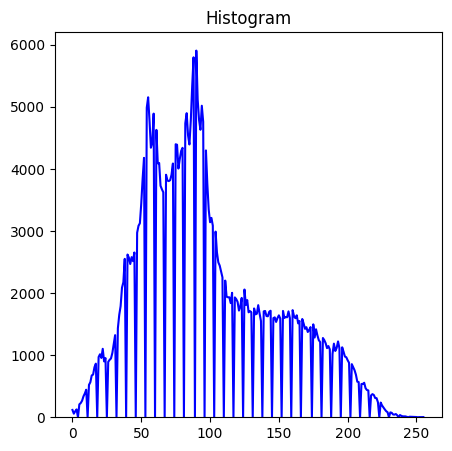

In [8]:
import matplotlib.pyplot as plt
image2 = cv2.imread('img2.png',1)

def create_histogram(image ,size):
    histogram= cv2.calcHist([image2] , [0] , None , [256] , [0,256])
    histogram=histogram.flatten()
    
    plt.figure(figsize=size)
    plt.title("Histogram")
    plt.hist([0,256])
    plt.plot(histogram,color = 'blue')
    
R = image2[:,:,2]
G = image2[:,:,1]
B = image2[:,:,0]
grayscale=np.uint8(0.3*R+0.59*G+0.11*B)

plot_size =(5,5)
create_histogram(grayscale,plot_size)

Task 4

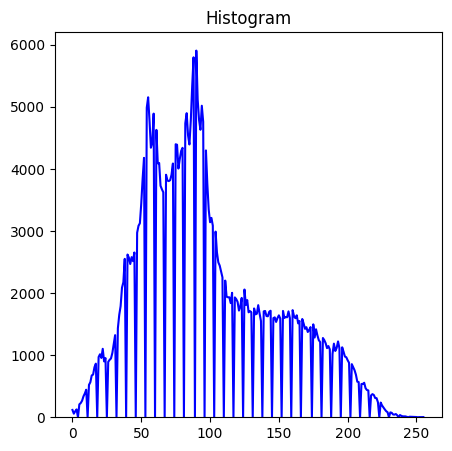

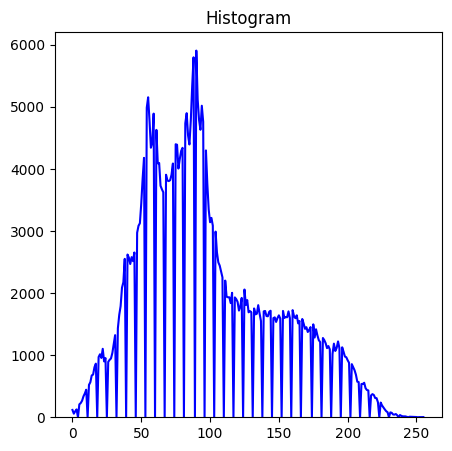

In [9]:
def CumulativeSum(hist):
    cumulative_sum = np.zeros(256)
    cumulative_sum[0] = hist[0]
    for i in range(1, 256):
        cumulative_sum[i] = cumulative_sum[i - 1] + hist[i]
    return cumulative_sum


def equalize_histogram(img):
    histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
    histogram = histogram.flatten()
    
    hist = CumulativeSum(histogram)
    minimum = min(hist)
    maximum = max(hist)

    equalized = ((hist - minimum) / (maximum - minimum)) * 255
    equalized= np.round(equalized).astype(np.uint8)

    equalized_image = equalized[img]
    return equalized_image



plot_size = (5, 5)
grayscale = np.uint8(0.3 * image2[:,:,2] + 0.59 * image2[:,:,1] + 0.11 * image2[:,:,0])


create_histogram(grayscale, plot_size)

equalized_image = equalize_histogram(grayscale)
create_histogram(equalized_image, plot_size)



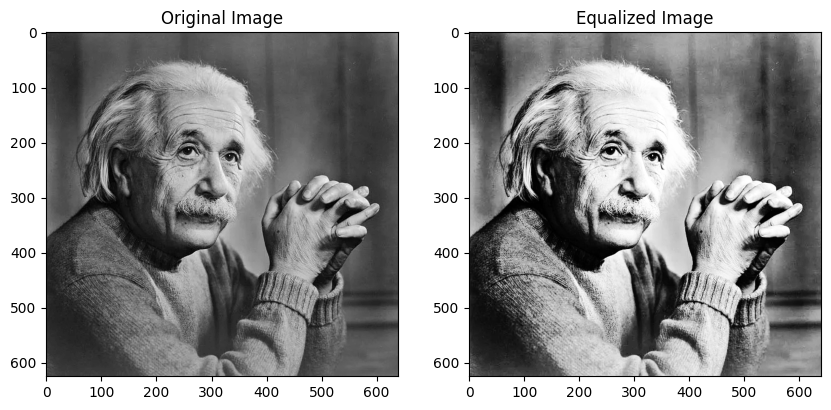

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(grayscale, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')

plt.show()

Task 5

In [11]:
#Loading the RGB image
image3 = cv2.imread('img.png',1)

#Displaying the image
cv2.imshow ("Lenna",image3)
cv2.waitKey(1)

-1

In [12]:
# Define a 3x3 kernel for spatial filtering
import numpy as np
kernel = np.array([[3, 0, 3],
                   [1, 0, 1],
                   [3, 0, 3]])
filter = cv2.filter2D(image, -1, kernel)
resize= cv2.resize(filter, (16, 16), interpolation=cv2.INTER_LINEAR)

# Display the original, filtered, and resized images
cv2.imshow("Original Image", image)
cv2.imshow("Filtered Image", filter)
cv2.imshow("Resized Image (16x16)", resize)

# Wait for a key press and then close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()
